In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/Data/Movies/

/content/drive/MyDrive/Data/Movies


In [3]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras

tf.__version__
# %tensorflow_version 2.x

'2.6.0'

In [4]:
ratings_cols = ['userId', 'movieId', 'rating', 'unix_timestamp']
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=ratings_cols)
ratings.head()

,userId,movieId,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
from sklearn.model_selection import train_test_split
train_ratings, test_ratings = train_test_split(ratings, test_size=0.2)

In [6]:
n_users, n_movies = len(ratings.userId.unique()), len(ratings.movieId.unique())
print(n_users, n_movies)
embedding_dim = 10

943 1682


In [7]:
user_input = keras.layers.Input(shape=[1], name='User')
user_embedding = keras.layers.Embedding(n_users + 1, embedding_dim, name='User_Embedding')(user_input)
user_vec = keras.layers.Flatten(name='Flatten_Users')(user_embedding)

movie_input = keras.layers.Input(shape=[1], name='Item')
movie_embedding = keras.layers.Embedding(n_movies + 1, embedding_dim, name='Movie_Embedding')(movie_input)
movie_vec = keras.layers.Flatten(name='Flatten_Movies')(movie_embedding)
 
prod = keras.layers.dot([movie_vec, user_vec], axes=1,name='DotProduct')
model = keras.Model([user_input, movie_input], prod)

In [8]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Item (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
User (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
Movie_Embedding (Embedding)     (None, 1, 10)        16830       Item[0][0]                       
__________________________________________________________________________________________________
User_Embedding (Embedding)      (None, 1, 10)        9440        User[0][0]                       
______________________________________________________________________________________________

In [46]:
history = model.fit([train_ratings.userId, train_ratings.movieId], train_ratings.rating, epochs=30, batch_size=256)

Epoch 1/30
313/313 [==============================] - 2s 6ms/step - loss: 0.4649 - mae: 0.5214 - mse: 0.4649
Epoch 2/30
313/313 [==============================] - 2s 6ms/step - loss: 0.4622 - mae: 0.5193 - mse: 0.4622
Epoch 3/30
313/313 [==============================] - 2s 6ms/step - loss: 0.4616 - mae: 0.5188 - mse: 0.4616
Epoch 4/30
313/313 [==============================] - 2s 6ms/step - loss: 0.4618 - mae: 0.5191 - mse: 0.4618
Epoch 5/30
313/313 [==============================] - 2s 6ms/step - loss: 0.4624 - mae: 0.5195 - mse: 0.4624
Epoch 6/30
313/313 [==============================] - 2s 6ms/step - loss: 0.4630 - mae: 0.5198 - mse: 0.4630
Epoch 7/30
313/313 [==============================] - 2s 6ms/step - loss: 0.4635 - mae: 0.5204 - mse: 0.4635
Epoch 8/30
313/313 [==============================] - 2s 6ms/step - loss: 0.4641 - mae: 0.5209 - mse: 0.4641
Epoch 9/30
313/313 [==============================] - 2s 6ms/step - loss: 0.4644 - mae: 0.5212 - mse: 0.4644
Epoch 10/30
313/313

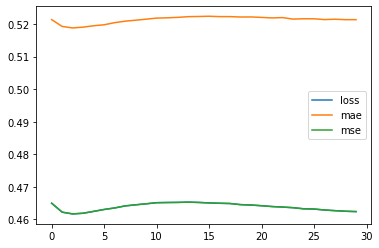

In [47]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot()

In [48]:
movie_embedding_learnt = model.get_layer(name='Movie_Embedding').get_weights()[0]
user_embedding_learnt = model.get_layer(name='User_Embedding').get_weights()[0]

In [49]:
user_id = 15
movies = user_embedding_learnt[user_id] @ movie_embedding_learnt.T

In [45]:
sorted(zip(movies, range(len(movies))))[-5:]

[(6.9799037, 1473),
 (7.0449653, 854),
 (7.3692093, 1512),
 (7.4448814, 1394),
 (7.746495, 1176)]